In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [4]:
data =pd.read_csv("/content/dataset_churn.csv")
data.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No


#data cleaning

In [5]:
data = data.drop(columns=['Unnamed: 0', 'CustomerID'])

In [6]:
data.isnull().sum()

Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

In [7]:
data.dtypes

Age                 float64
Gender               object
Tenure                int64
Service_Internet     object
Service_Phone        object
Service_TV           object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
StreamingMovies      object
StreamingMusic       object
OnlineSecurity       object
TechSupport          object
Churn                object
dtype: object

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Service_Internet'] = data['Service_Internet'].fillna(data['Service_Internet'].mode().iloc[0])
data['PaymentMethod'] = data['PaymentMethod'].fillna(data['PaymentMethod'].mode().iloc[0])


In [9]:
data.isnull().sum()

Age                 0
Gender              0
Tenure              0
Service_Internet    0
Service_Phone       0
Service_TV          0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
StreamingMovies     0
StreamingMusic      0
OnlineSecurity      0
TechSupport         0
Churn               0
dtype: int64

In [10]:
categorical_features = ['Gender', 'Service_Internet', 'Service_Phone', 'Service_TV',
                        'Contract', 'PaymentMethod', 'StreamingMovies', 'StreamingMusic',
                        'OnlineSecurity', 'TechSupport','Churn']
for featurew in categorical_features:
  data[featurew] = LabelEncoder().fit_transform(data[featurew])
data.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0
1,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0
2,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0
3,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0
4,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0


# handling Outliers checking

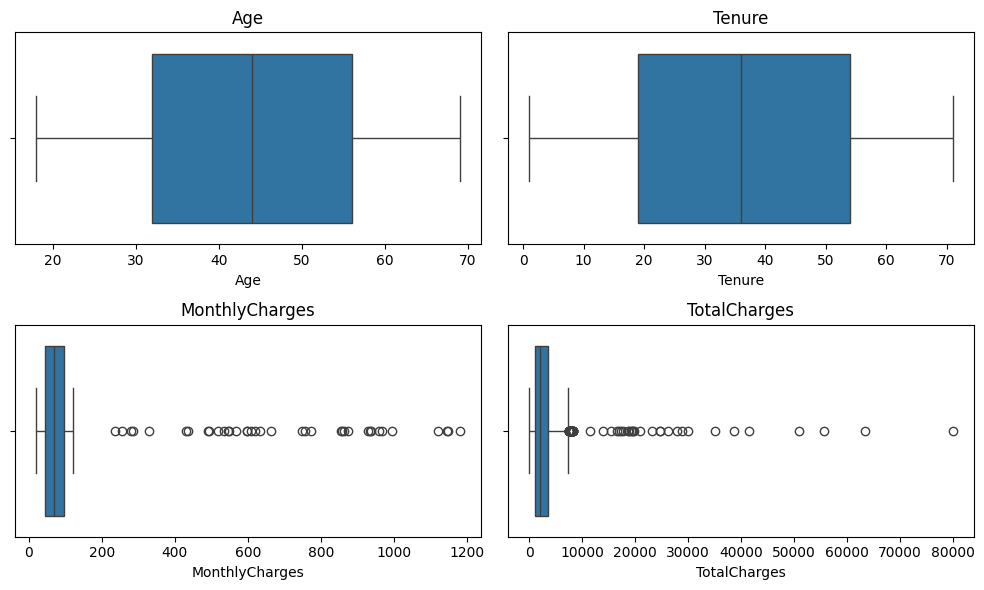

In [11]:
numerical_features=['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [12]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data[column].median()

    data[column] = np.where(
        (data[column] < lower_bound) | (data[column] > upper_bound),
        median_value,
        data[column]
    )
    return data

for features in numerical_features:
  data = replace_outliers_with_median(data, features)


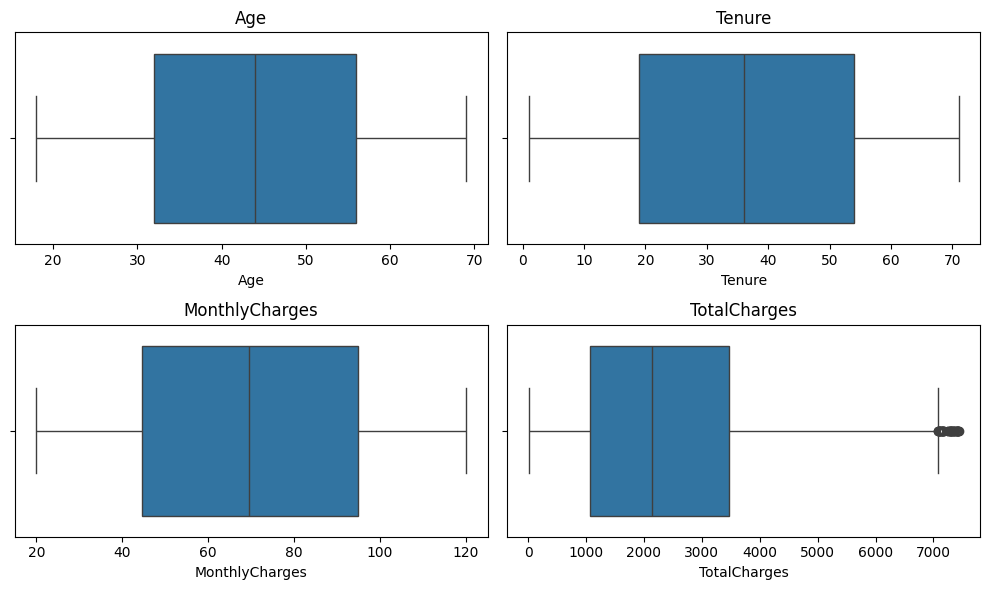

In [13]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# EDA ( Exploratory Data Analysis )



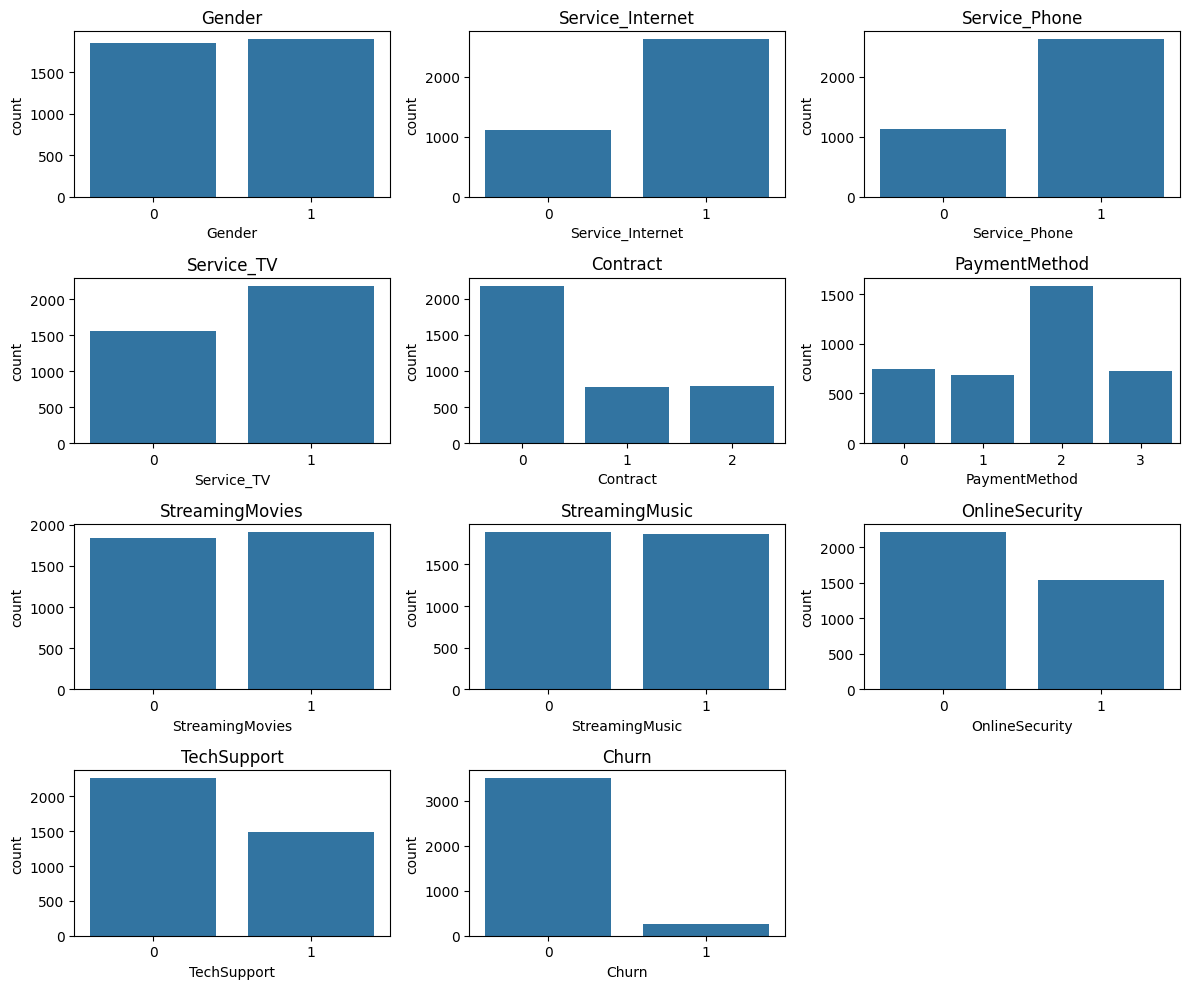

In [14]:

plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

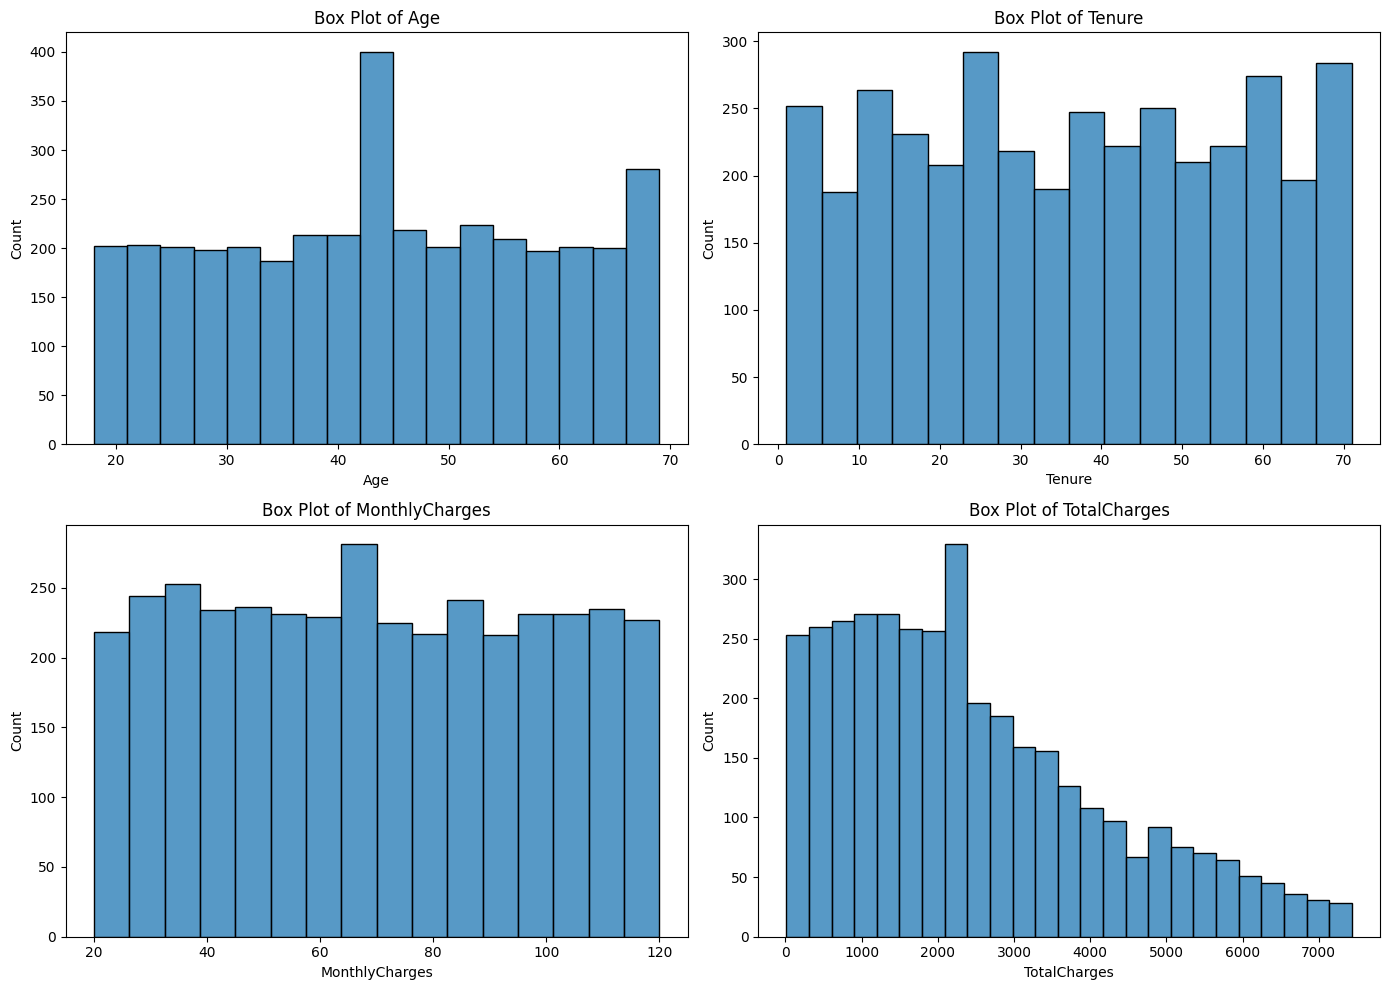

In [15]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


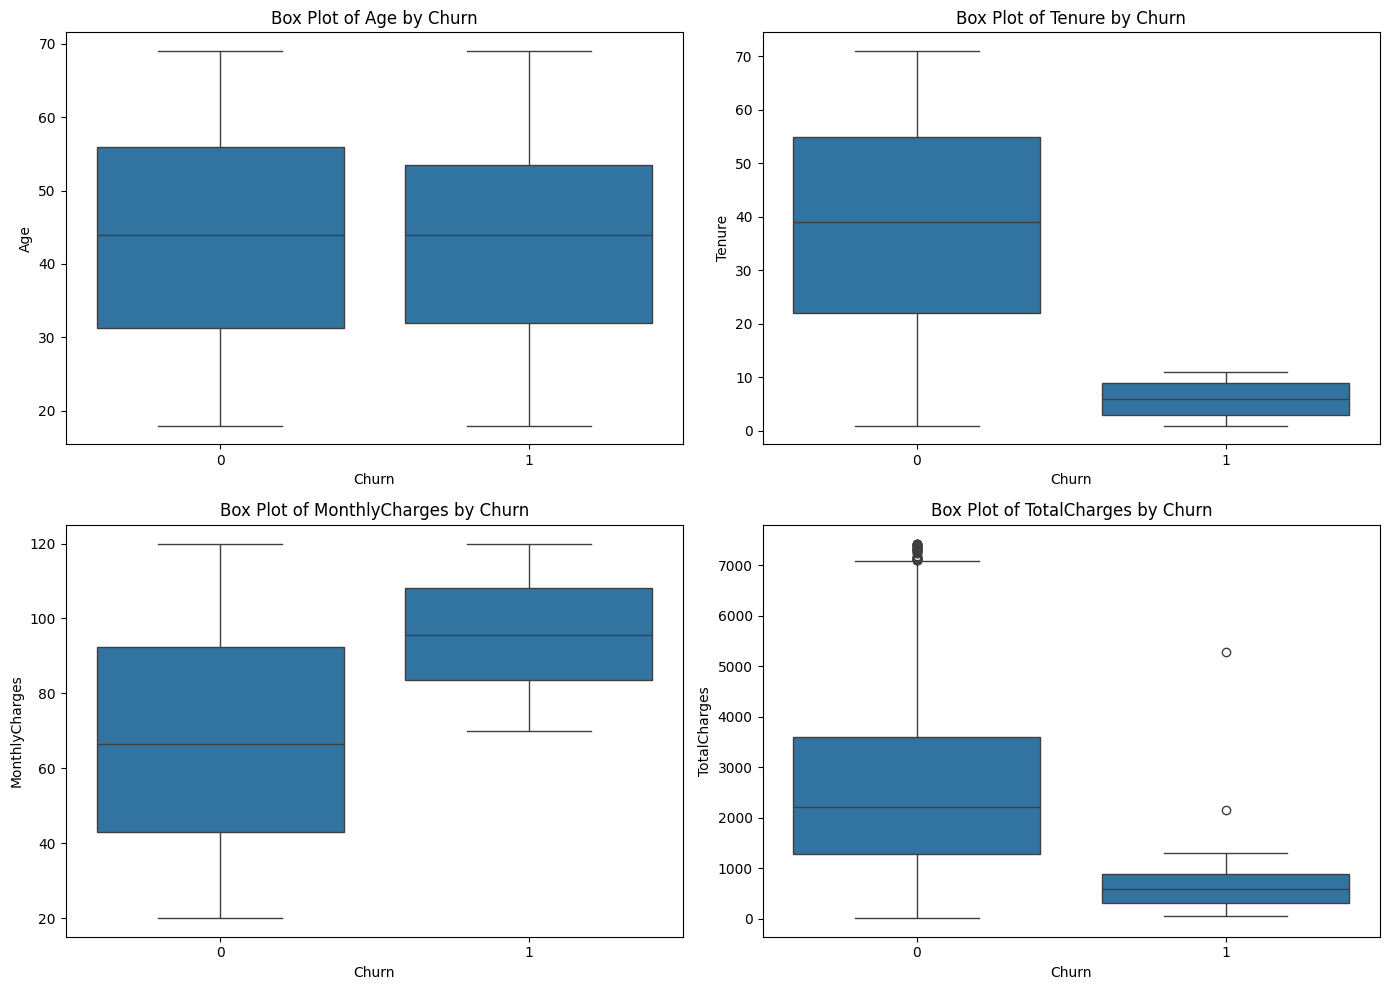

In [16]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Churn')
plt.tight_layout()
plt.show()


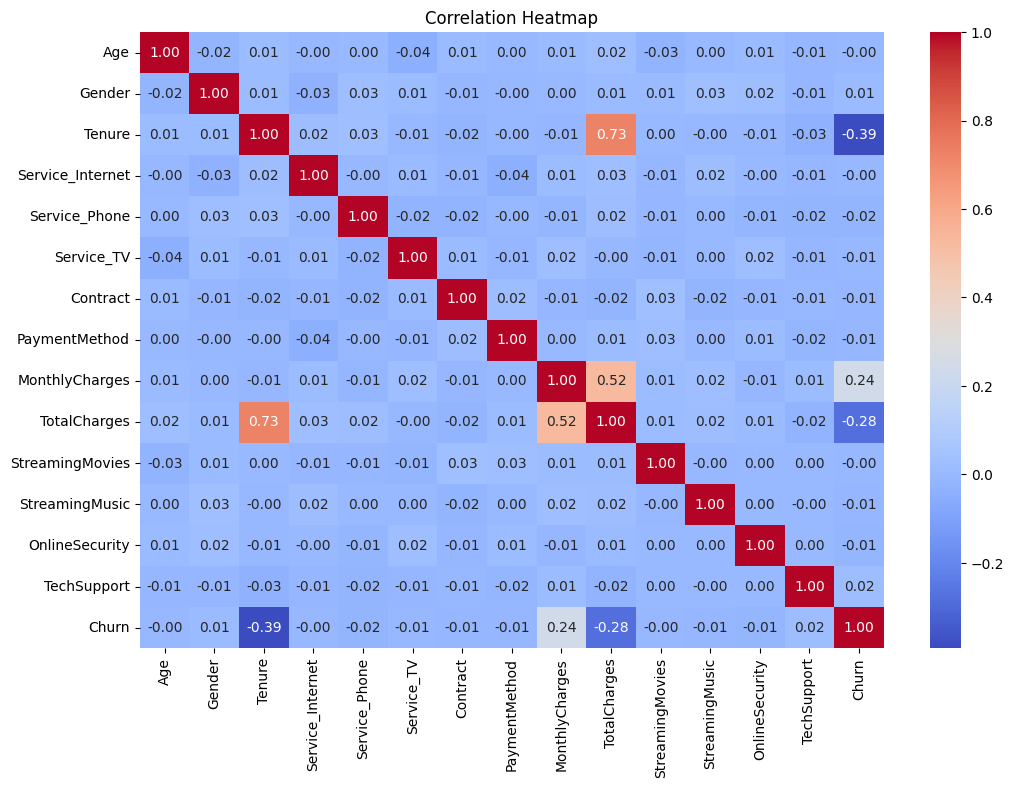

In [17]:
corr=data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [18]:
data.to_csv('cleaned_data.csv')

In [19]:
data['Tenure_MonthlyCharges'] = data['MonthlyCharges'] / data['Tenure']

In [20]:
data['AvgMonthlyCharges'] = data['TotalCharges'] / (data['Tenure'] + 1e-10)

In [21]:
data['TotalServices'] = (data['Service_Internet'] +
                         data['Service_Phone'] +
                         data['Service_TV'] +
                         data['StreamingMovies'] + data['StreamingMusic'] + data['OnlineSecurity'] + data['TechSupport'])

In [22]:
data['AvgChargesPerService'] = data['MonthlyCharges'] / (data['TotalServices'] + 1e-10)

In [23]:
data.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn,Tenure_MonthlyCharges,AvgMonthlyCharges,TotalServices,AvgChargesPerService
0,56.0,1,13.0,0,1,0,1,3,71.88,931.49,0,0,1,0,0,5.529231,71.653077,2,35.940000
1,69.0,1,13.0,0,0,1,2,3,110.99,1448.46,1,1,0,0,0,8.537692,111.420000,3,36.996667
2,46.0,1,60.0,1,0,1,0,3,116.74,6997.73,1,1,0,0,0,1.945667,116.628833,4,29.185000
3,32.0,0,57.0,1,1,1,0,0,78.16,4452.13,0,1,0,1,0,1.371228,78.107544,5,15.632000
4,60.0,1,52.0,1,1,1,2,2,30.33,1569.73,1,0,1,1,0,0.583269,30.187115,6,5.055000


In [24]:
X = data.drop('Churn', axis=1)  #features
y = data['Churn']  # Target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Selection

In [26]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training and evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       707
           1       0.86      0.72      0.78        43

    accuracy                           0.98       750
   macro avg       0.92      0.86      0.89       750
weighted avg       0.98      0.98      0.98       750



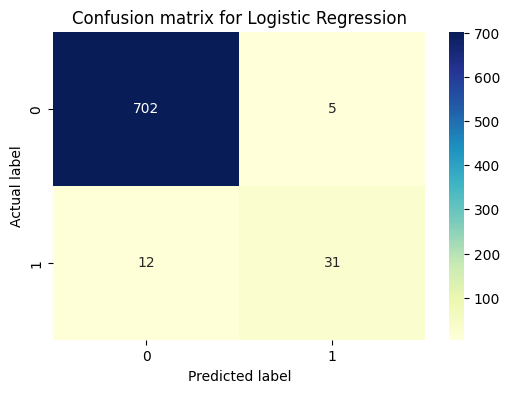

Training and evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



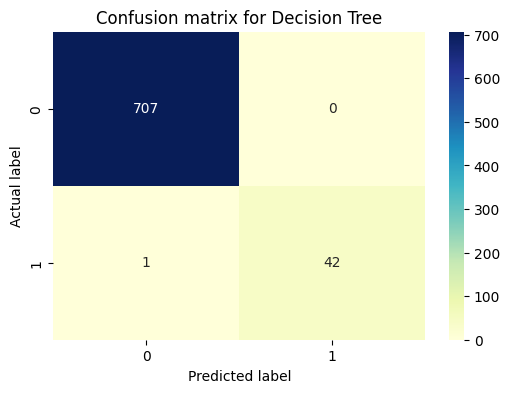

Training and evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      1.00      1.00        43

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



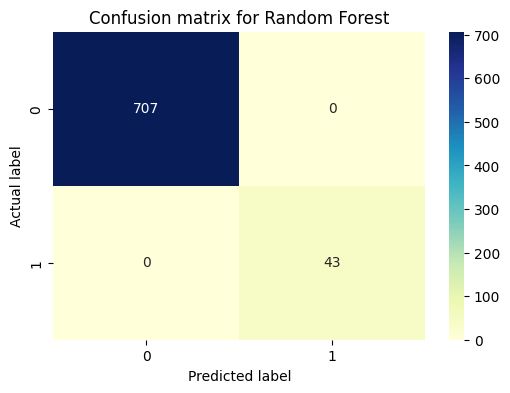

Training and evaluating Gradient Boosting...
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      1.00      1.00        43

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



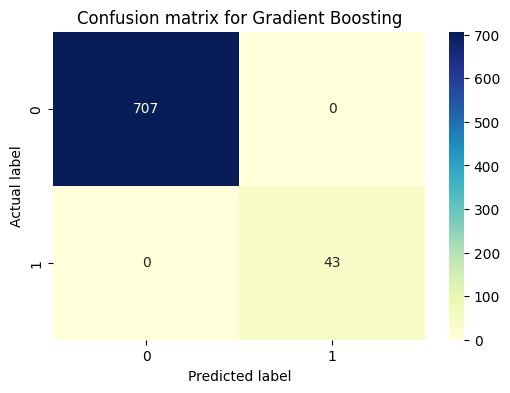

,Classification Report,Confusion Matrix
Logistic Regression,"{'0': {'precision': 0.9831932773109243, 'recal...","[[702, 5], [12, 31]]"
Decision Tree,"{'0': {'precision': 0.998587570621469, 'recall...","[[707, 0], [1, 42]]"
Random Forest,"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...","[[707, 0], [0, 43]]"
Gradient Boosting,"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...","[[707, 0], [0, 43]]"


In [27]:

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        print(f"Training and evaluating {model_name}...")


        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))


        conf_matrix = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(6, 4))
        sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        plt.title(f'Confusion matrix for {model_name}')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()


        results[model_name] = {
            'Classification Report': classification_report(y_test, y_pred, output_dict=True),
            'Confusion Matrix': conf_matrix
        }


    results_df = pd.DataFrame(results).T

    return results_df


results_df = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)


display(results_df)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



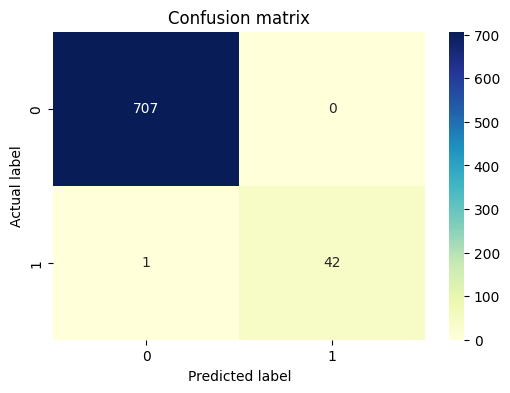

In [28]:

# Parameter grids for the models
ls_para_grids = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

dt_para_grids = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

rf_param_grids = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

gb_param_grids = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

def model_evalution(model, param_grid, X_train, y_train, X_test, y_test):
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Training the model with the best parameters
    best_model = grid_search.best_estimator_

    # Predictions
    predictions = best_model.predict(X_test)

    # Best parameters
    best_parameters = grid_search.best_params_
    print("Best Parameters:", best_parameters)

    print("Classification Report:")
    print(classification_report(y_test, predictions))


    conf_matrix = confusion_matrix(y_test, predictions)


    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return best_model


rf = model_evalution(RandomForestClassifier(), rf_param_grids, X_train_scaled, y_train, X_test_scaled, y_test)


Best Parameters: {'max_depth': 20, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



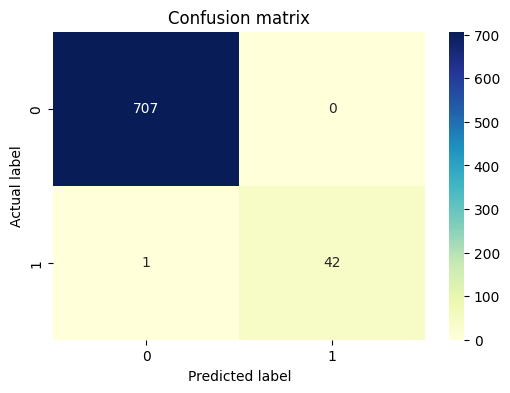

In [29]:
dt=model_evalution(DecisionTreeClassifier(), dt_para_grids, X_train_scaled, y_train, X_test_scaled, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      1.00      1.00        43

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



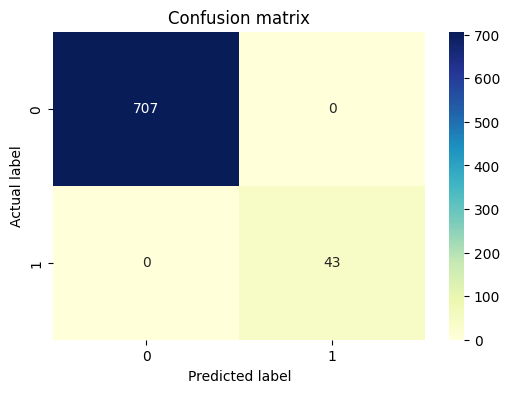

In [30]:
gb=model_evalution(GradientBoostingClassifier(), gb_param_grids, X_train_scaled, y_train, X_test_scaled, y_test)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       707
           1       0.84      0.86      0.85        43

    accuracy                           0.98       750
   macro avg       0.92      0.93      0.92       750
weighted avg       0.98      0.98      0.98       750



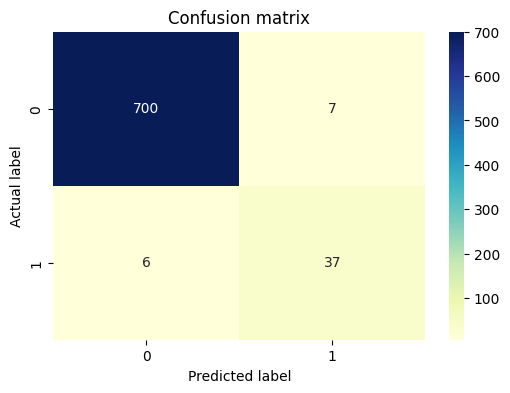

In [31]:
lr=model_evalution(LogisticRegression(), ls_para_grids, X_train_scaled, y_train, X_test_scaled, y_test)

In [32]:
import pickle

pickle.dump(rf, open('/content/drive/MyDrive/maschineL/model/rf.pkl', 'wb'))
pickle.dump(dt, open('/content/drive/MyDrive/maschineL/model/dt.pkl', 'wb'))
pickle.dump(gb, open('/content/drive/MyDrive/maschineL/model/gb.pkl', 'wb'))
pickle.dump(lr, open('/content/drive/MyDrive/maschineL/model/ls.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/maschineL/model/rf.pkl'